## Linear Regression

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
data=pd.read_csv('/Users/elahehbeheshti/desktop/Fall2024/Machine Learning/Algorithm/Regression/Swedish Auto Insurance.csv')

print(data)


      X      Y
0     0    0.0
1     2    6.6
2     3    4.4
3     3   13.2
4     3   39.9
..  ...    ...
59   57  170.9
60   60  202.4
61   61  217.6
62  108  392.5
63  124  422.2

[64 rows x 2 columns]


In [164]:
data.head()

,X,Y
0,0,0.0
1,2,6.6
2,3,4.4
3,3,13.2
4,3,39.9


In [165]:
data.describe()

,X,Y
count,64.000000,64.000000
mean,23.250000,99.996875
std,23.329932,87.832931
min,0.000000,0.000000
25%,7.750000,39.225000
50%,14.500000,74.750000
75%,29.250000,144.775000
max,124.000000,422.200000


### Ploting of Data

Text(0.5, 1.0, 'Auto Insurance in Sweden')

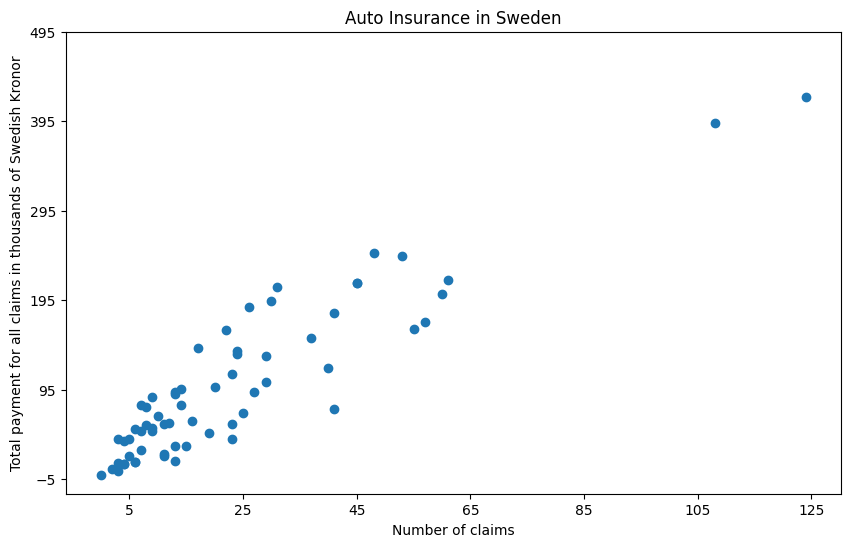

In [166]:
plt.figure(figsize=(10, 6))  # Width=20, Height=10 (You can adjust these values as needed)
plt.scatter(data['X'],data['Y'])
plt.xticks(np.arange(5,130,step=20))
plt.yticks(np.arange(-5,500,step=100))
plt.xlabel("Number of claims")
plt.ylabel("Total payment for all claims in thousands of Swedish Kronor")
plt.title("Auto Insurance in Sweden")

### implemented with sklearn train_test_split and linear regression model

In [167]:
X = data['X']
y = data['Y']

In [168]:
### Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)

print('X-train size', X_train.size)
print('X-test size', X_test.size)
print('y-train size', y_train.size)
print('y-test size', y_test.size)

X-train size 57
X-test size 7
y-train size 57
y-test size 7


### linear regression model 


In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
"""
LinearRegression doesnot take 1-d array

fit(X, y, sample_weight=None)

X : numpy array or sparse matrix of shape [n_samples,n_features]

predict(X)

X : {array-like, sparse matrix}, shape = (n_samples, n_features)
"""
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

model = lr.fit(X_train, y_train)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

y_pred = lr.predict(X_test)

confidence = lr.score(X_test, y_test)
print(confidence)

alpha = 18.4007498619181
betas = [3.45120091]
0.7814268159414494


In [170]:
#intercept
print(lr.intercept_)

#sloop
print(lr.coef_)

18.4007498619181
[3.45120091]


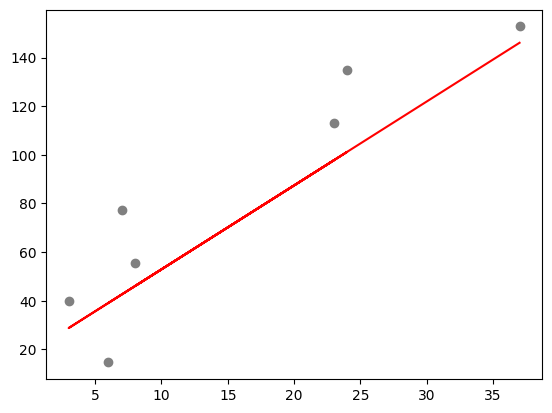

In [171]:
plt.scatter(X_test,y_test, color='gray')
plt.plot(X_test, y_pred, color='red')
plt.show()

gray dots are y_tests, and the red line has drawn by connecting y-predictions

In [172]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squard Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squard Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 19.39728045519473
Mean Squard Error: 492.57706287561683
Root Mean Squard Error: 22.194077202614594
R2 Score: 0.7814268159414494


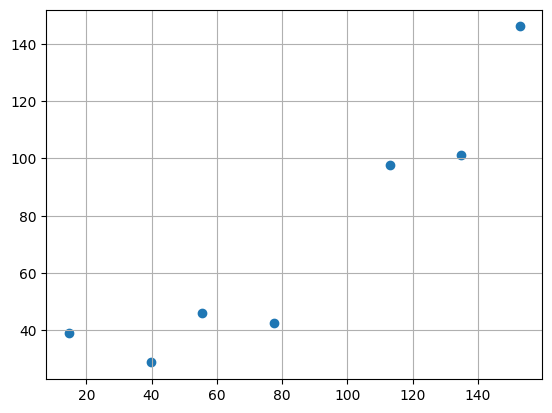

In [173]:
plt.scatter(y_test, y_pred)
plt.plot()
plt.grid()

In [174]:
##The code checks how many predictions differ from the actual y_test values and prints this count.
##It also prints the count of y_pred values that lie within a self-defined range (which is redundant because every element in y_pred will lie within this range)

y_pred = lr.predict(X_test)
y_test_mean = np.mean(y_test)
y_std = np.std(y_test)

print('prediction and testing not same samples: %d' % (y_test != y_pred).sum())
num = ( (y_pred - y_std <= y_pred) & (y_pred <= y_pred + y_std) ).sum()
print(num)

prediction and testing not same samples: 7
7


In [175]:
# Print first few rows of training data
print(X_train)   # If X_train is a DataFrame


[[ 16]
 [ 13]
 [ 26]
 [ 29]
 [ 23]
 [ 23]
 [  6]
 [ 30]
 [ 15]
 [ 13]
 [ 25]
 [ 11]
 [ 41]
 [ 53]
 [ 41]
 [ 48]
 [ 13]
 [108]
 [  3]
 [ 14]
 [ 29]
 [ 61]
 [ 14]
 [ 57]
 [ 17]
 [ 11]
 [ 19]
 [ 10]
 [ 12]
 [124]
 [  9]
 [ 45]
 [  9]
 [ 45]
 [  4]
 [ 11]
 [ 22]
 [  9]
 [  2]
 [  3]
 [ 24]
 [  5]
 [ 27]
 [  7]
 [  8]
 [  4]
 [ 31]
 [  6]
 [ 55]
 [  7]
 [  5]
 [ 20]
 [  0]
 [ 60]
 [  4]
 [ 13]
 [ 40]]


In [176]:
print(y_train)

33     59.6
28     93.0
44    187.5
46    103.9
38     56.9
39     39.6
10     50.9
48    194.5
32     32.1
29     31.9
43     69.2
24     21.3
52    181.3
57    244.6
53     73.4
56    248.1
27     89.9
62    392.5
3      13.2
31     95.5
47    133.3
61    217.6
30     77.5
59    170.9
34    142.1
22     23.5
35     46.2
21     65.3
25     58.1
63    422.2
18     48.7
55    214.0
19     52.1
54    214.0
7      12.6
23     57.2
37    161.5
20     87.4
1       6.6
2       4.4
42    137.9
9      40.3
45     92.6
13     48.8
16     76.1
5      11.8
49    209.8
11     14.8
58    162.8
15     27.9
8      20.9
36     98.1
0       0.0
60    202.4
6      38.1
26     15.7
51    119.4
Name: Y, dtype: float64


First 7: Shows the number of samples where the predictions are different from the actual values.


Second 7: Shows the total number of elements in y_pred, because every y_pred will satisfy y_pred - y_std <= y_pred <= y_pred + y_std.


In [181]:
#The code snippet creates a NumPy array reshapes it into a 2D array, 
#and then uses the Linear Regression model (lr) to predict values for these inputs.
#The predicted values are multiplied by 10,000 to scale them up.
#If you want to predict a value based on a regression model, the numbers should represent 
# meaningful inputs that are within the range of your training data.
#Choose numbers that are within the range of the data used to train the model.

predict1=lr.predict(np.array([5.5,8]).reshape(-1,1))*10000
print(predict1.ndim)
print(predict1.shape)

print("For Number of claims = 55,000, we predict a total payment of $"+str(round(predict1[0],0)))
print("For Number of claims = 80,000, we predict a total payment of $"+str(round(predict1[1],0)))

1
(2,)
For Number of claims = 55,000, we predict a total payment of $373824.0
For Number of claims = 80,000, we predict a total payment of $460104.0


## implementation of linear regression model

### Compute the Cost Function $J(\Theta)$

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [182]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [192]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

8796.72890625

### Gradient Descent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat unitil convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [193]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [194]:
theta = theta.reshape(-1, 1)  # Reshape theta to be a column vector (n, 1)

print("Theta:", theta)
print("Theta shape:", theta.shape)


Theta: [[0.]
 [0.]]
Theta shape: (2, 1)


In [195]:

print("Check for NaNs in X:", np.isnan(X).sum())  # Count NaNs in X
print("Check for NaNs in y:", np.isnan(y).sum())  # Count NaNs in y
print("Check for Infinities in X:", np.isinf(X).sum())  # Count infinite values in X
print("Check for Infinities in y:", np.isinf(y).sum())  # Count infinite values in y


Check for NaNs in X: 0
Check for NaNs in y: 0
Check for Infinities in X: 0
Check for Infinities in y: 0


In [196]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of theta:", theta.shape)


Shape of X: (64, 2)
Shape of y: (64, 1)
Shape of theta: (2, 1)


In [197]:
theta,J_history = gradientDescent(X,y,theta,0.001,1500)


print("h(x) = " + str(round(theta[0, 0], 2)) + " + " + str(round(theta[1, 0], 2)) + "x1")

print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) = 10.57 + 3.64x1
h(x) =10.57 + 3.64x1


### Visualising the Cost Function $J(\Theta)$

In [198]:
from mpl_toolkits.mplot3d import Axes3D

In [199]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_43527/3811637788.py:6: SyntaxWarning: invalid escape sequence '\T'
  ax.set_xlabel("$\Theta_0$")
/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_43527/3811637788.py:7: SyntaxWarning: invalid escape sequence '\T'
  ax.set_ylabel("$\Theta_1$")
/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_43527/3811637788.py:8: SyntaxWarning: invalid escape sequence '\T'
  ax.set_zlabel("$J(\Theta)$")


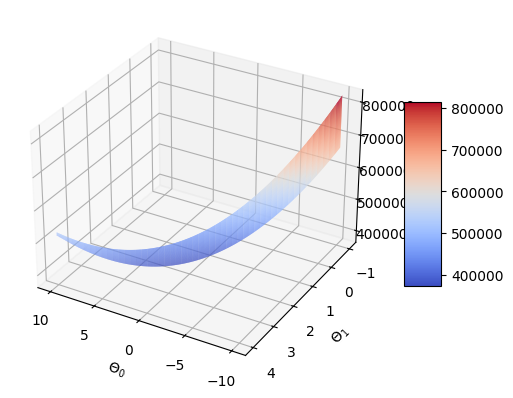

In [200]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

### Testing the implementation

Plot $J(\Theta)$ against the number of iteration 

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_43527/992478879.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

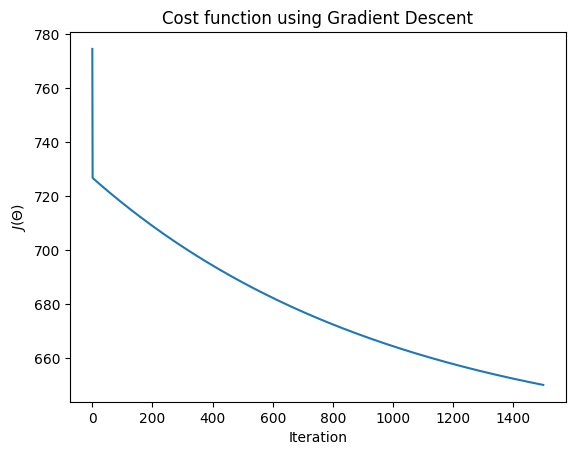

In [201]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Graph with Line of Best Fit

alpha = 18.4007498619181
betas = [3.45120091]


Text(0.5, 1.0, 'Profit Prediction')

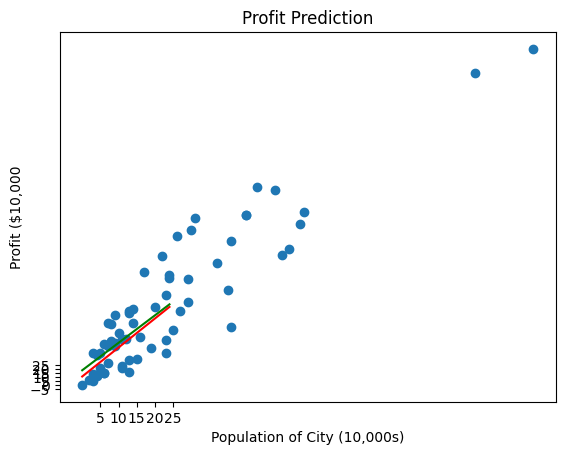

In [202]:
plt.scatter(data['X'],data['Y'])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')
y_sklearn_value = [y*model.coef_ + model.intercept_ for y in x_value] #check if sklearn model and raw model match
plt.plot(x_value,y_value,color="r")
plt.plot(x_value, y_sklearn_value, color="g")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### Make predictions using the optimized $\Theta$ values

$h_\Theta(x) = \Theta^Tx$

In [203]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [204]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $233282.0


In [205]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $360814.0
